In [1]:
import pandas as pd

cv = pd.read_csv('updated_convos.csv', encoding="utf-8")

/Users/Aleesa/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Prepping data to put into a language model

## Creating training csv

In [ ]:
# Cleaning cv 
del cv['message']
del cv['from']

cv = cv[['to', 'final_messages', 'Sex', 'sent_date']]

# Creating short conversation data for language model
m_scv = cv.head(1500) 
f_scv = cv.tail(1500)

scv = pd.concat([m_scv, f_scv])

#Cleaning
del scv["Sex"]
del scv["sent_date"]
del scv["to"]

#Adding new column
scv['polarity'] = None

#Rearranging columbs
svc = scv[["polarity", "final_messages"]]

svc.to_csv("shortcv.csv", index = False, header=True)

## Creating testing csv

In [101]:
test_cv = pd.read_csv('updated_convos.csv', encoding="utf-8")

# Cleaning cv 
del test_cv['message']
del test_cv['from']
del test_cv['to']
del test_cv['sent_date']

# Adding polarity column
test_cv['polarity'] = None

# Rearranging columns
test_cv = test_cv[["polarity", "Sex", "final_messages"]]

In [102]:
# Dropping rows that were previously tested
test_cv = test_cv.drop(df.index[:1500])
test_cv = test_cv.drop(df.index[-1500:])

# Combining new files
m_test = test_cv.head(1500) 
f_test = test_cv.tail(1500)

# New df with these values
test_cv = pd.concat([m_test, f_test])

# Exporting to csv
test_cv.to_csv("test_cv.csv", index = False, header=True)

## Building language model
The language model was built in a separate notebook via Google Colab.

# Discovering most commonly used words and emojis
The following includes data from both sexes.
Due to the size of the data, I only included 200,000 messages. <br> df_1 contains 100,000 male messages whereas df_2 contains 100,000 female messages.

In [9]:
# Cleaning cv 
cv = pd.read_csv('updated_convos.csv', encoding="utf-8")
del cv['message']
del cv['from']
del cv['to']

cv = cv[['final_messages', 'Sex', 'sent_date']]

# Smaller df with only 100,000 lines
df_1 = cv.head(100000)
df_2 = cv.tail(100000)

df = pd.concat([df_1, df_2])

del cv["Sex"]
del cv["sent_date"]

In [10]:
# Filter out stopwords
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

df['convo'] = df['final_messages'].fillna('').str.lower()
stop = stopwords.words('english') 
stop.extend(("’", "’", "‘", "“", "„"))
stop.append('\'s')
stop.append('\'m')
stop.append('n\'t')


def remove_stop(x): 
    #remove stop words from sentence and return str
    return ' '.join([word for word in TextBlob(x).words if word.lower() not in stop])

df['convo_clean'] = df['convo'].map(lambda x:remove_stop(x))

In [12]:
# More cleaning
del df['final_messages']
del df['convo']

In [13]:
# Single String with all texts
convos = df['convo_clean'].tolist()

convos = ' '.join(convos)
#convos

In [114]:
# Count word occurences, convert to df and show table
from collections import Counter

wordcount_convos = Counter(TextBlob(convos).words).most_common(500)

top_convos = pd.DataFrame(wordcount_convos, columns=['word', 'count'])\
                .sort_values('count', ascending=False)

top_convos.head(2)

word  count
0  like  14637
1   lol   8284

In [108]:
# Top 10 words for both sexes visualized
import numpy as np
import hvplot.pandas 

top10_convos.hvplot.bar(x='word', y='count', invert=True, flip_yaxis=True, title='Top 10 words', xlabel='')\
        .opts(fontsize={"yticks": 15, "title": 20}, width=500, height=350) 

:Bars   [word]   (count)

(-0.5, 3755.5, 3755.5, -0.5)

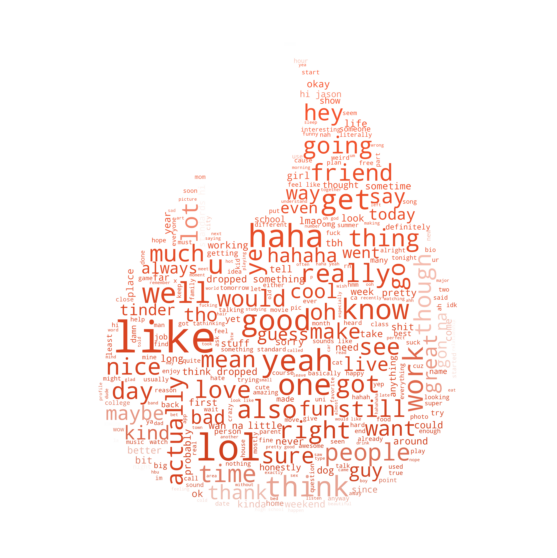

In [17]:
# Making wordcloud with top words used by both sexes
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
mask = np.array(Image.open('oldlogo.png'))

wordcloud = WordCloud(
                background_color='white', stopwords=stop, mask = mask, 
                max_words=500, max_font_size=100, min_font_size = 10, scale=3,
                width=mask.shape[1],height=mask.shape[0],
                ).generate(str(convos))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(10, 10));
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
plt.axis("off")

In [115]:
# Finding most commonly used emojis for both sexes
import emoji
emojis_unicode = []
tb_convos = TextBlob(convos).words

for word in tb_convos:
    if word in emoji.UNICODE_EMOJI["en"]:
        emojis_unicode.append(emoji.emojize(word))

emoji_df = pd.DataFrame(Counter(emojis_unicode).most_common(10), columns=['emoji','count'])
emoji_df.head(2)

emoji  count
0     😂   3042
1     😊    931

In [22]:
# Visualizing most commonly used emojis for both sexes
import numpy as np
import hvplot.pandas 

emoji_df.hvplot.bar(x='emoji', y='count', invert=True, flip_yaxis=True, title='Top 10 emojis', xlabel='')\
        .opts(fontsize={"yticks": 15, "title": 20}, width=500, height=350) 

:Bars   [emoji]   (count)

# Now to do all of this again, but separated by gender

In [23]:
m_df = df_1
f_df = df_2

In [26]:
# Filter out stopwords
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

m_df['convo'] = m_df['final_messages'].fillna('').str.lower()
stop = stopwords.words('english') 
stop.extend(("’", "’", "‘", "“", "„"))
stop.append('\'s')
stop.append('\'m')
stop.append('n\'t')

f_df['convo'] = f_df['final_messages'].fillna('').str.lower()
stop = stopwords.words('english') 
stop.extend(("’", "’", "‘", "“", "„"))
stop.append('\'s')
stop.append('\'m')
stop.append('n\'t')


def remove_stop(x): 
    #remove stop words from sentence and return str
    return ' '.join([word for word in TextBlob(x).words if word.lower() not in stop])

m_df['convo_clean'] = m_df['convo'].map(lambda x:remove_stop(x))
f_df['convo_clean'] = f_df['convo'].map(lambda x:remove_stop(x))

<ipython-input-26-b79b7ef13ef2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_df['convo'] = m_df['final_messages'].fillna('').str.lower()
<ipython-input-26-b79b7ef13ef2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['convo'] = f_df['final_messages'].fillna('').str.lower()
<ipython-input-26-b79b7ef13ef2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [27]:
# More cleaning
del m_df['final_messages']
del m_df['convo']

del f_df['final_messages']
del f_df['convo']

In [28]:
# Single String with all texts
m_convos = m_df['convo_clean'].tolist()
f_convos = f_df['convo_clean'].tolist()

m_convos = ' '.join(m_convos)
f_convos = ' '.join(f_convos)

In [109]:
# Count word occurences, convert to df and show table
from collections import Counter

wordcount_m_convos = Counter(TextBlob(m_convos).words).most_common(500)
wordcount_f_convos = Counter(TextBlob(f_convos).words).most_common(500)

top_m_convos = pd.DataFrame(wordcount_m_convos, columns=['word', 'count'])\
                .sort_values('count', ascending=False)
top_f_convos = pd.DataFrame(wordcount_f_convos, columns=['word', 'count'])\
                .sort_values('count', ascending=False)

In [ ]:
top10_m = top_m_convos.head(10)

In [111]:
import numpy as np
import hvplot.pandas 

top10_m.hvplot.bar(x='word', y='count', invert=True, flip_yaxis=True, title='Top 10 words used by males', xlabel='')\
        .opts(fontsize={"yticks": 15, "title": 20}, width=500, height=350) 

:Bars   [word]   (count)

In [112]:
top10_f = top_f_convos.head(10)

In [113]:
import numpy as np
import hvplot.pandas 

top10_f.hvplot.bar(x='word', y='count', invert=True, flip_yaxis=True, title='Top 10 words used by females', xlabel='')\
        .opts(fontsize={"yticks": 15, "title": 20}, width=500, height=350) 

:Bars   [word]   (count)

(-0.5, 3755.5, 3755.5, -0.5)

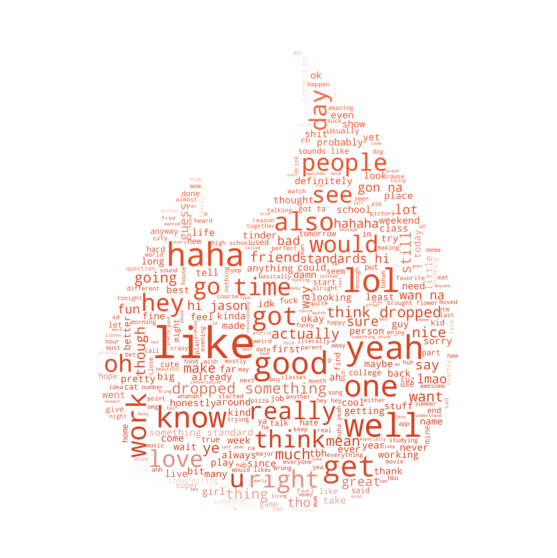

In [33]:
# Male wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
mask = np.array(Image.open('oldlogo.png'))

wordcloud = WordCloud(
                background_color='white', stopwords=stop, mask = mask, 
                max_words=500, max_font_size=100, min_font_size = 10, scale=3,
                width=mask.shape[1],height=mask.shape[0],
                ).generate(str(m_convos))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(10, 10));
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
plt.axis("off")

(-0.5, 3755.5, 3755.5, -0.5)

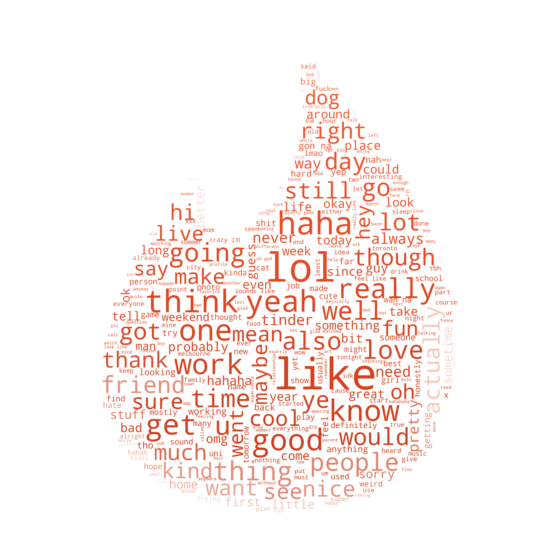

In [34]:
# Female wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
mask = np.array(Image.open('oldlogo.png'))

wordcloud = WordCloud(
                background_color='white', stopwords=stop, mask = mask, 
                max_words=500, max_font_size=100, min_font_size = 10, scale=3,
                width=mask.shape[1],height=mask.shape[0],
                ).generate(str(f_convos))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(10, 10));
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
plt.axis("off")

In [35]:
import emoji
emojis_m_unicode = []
emojis_f_unicode = []

tb_m_convos = TextBlob(m_convos).words
tb_f_convos = TextBlob(f_convos).words

for word in tb_m_convos:
    if word in emoji.UNICODE_EMOJI["en"]:
        emojis_m_unicode.append(emoji.emojize(word))

for word in tb_f_convos:
    if word in emoji.UNICODE_EMOJI["en"]:
        emojis_f_unicode.append(emoji.emojize(word))
        
emoji_m = pd.DataFrame(Counter(emojis_m_unicode).most_common(10), columns=['emoji','count'])
emoji_f = pd.DataFrame(Counter(emojis_f_unicode).most_common(10), columns=['emoji','count'])

In [36]:
emoji_m

emoji  count
0     😂   1704
1     😊    614
2     😅    347
3     😉    295
4     😁    215
5     😜    209
6     😄    175
7     🤔    152
8     🙂    150
9     🥴    144

In [37]:
emoji_f

emoji  count
0     😂   1338
1     😅    362
2     😊    317
3     😘    253
4     😉    193
5     😍    147
6     😭    146
7     😜    133
8     😋    130
9     😌    123

In [38]:
import numpy as np
import hvplot.pandas 

emoji_m.hvplot.bar(x='emoji', y='count', invert=True, flip_yaxis=True, title='Top 10 male emojis', xlabel='')\
        .opts(fontsize={"yticks": 15, "title": 20}, width=500, height=350) 

:Bars   [emoji]   (count)

In [39]:
emoji_f.hvplot.bar(x='emoji', y='count', invert=True, flip_yaxis=True, title='Top 10 female emojis', xlabel='')\
        .opts(fontsize={"yticks": 15, "title": 20}, width=500, height=350) 

:Bars   [emoji]   (count)